# Przygotowanie

Przygotowanie Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko. {nr_albumu}_{imię}_{nazwisko}_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji.

# Drzewa decyzyjne

Podobnie jak w przypadku maszyny wektorów nosnych (SVC), drzewa decyzyjne sa wszechstronnym algorytmem uczenia maszynowego. Mogą słuzyc do rozwiazywania problemów zarówno klasyfikacji, jak i regresji. W przeciwieństwie do modelu SVC drzewa decyzyjne nie wymagają restrykcyjnego przygotowania danych (np. skalowania cech). Drzewa decyzyjne składaja sie z korzenia oraz gałezi prowadzacych do kolejnych wierzchołków. W wezłach - wierzchołkach z których wychodzi co najmniej jedna krawedź, sprawdzany jest pewien warunek. Na jego podstawie, wybierana jest gałaz prowadząca do kolejnego wierzchołka. Dana obserwacja zostaje zaklasyfikowana do konkretnej klasy po przejściu od korzenia do liscia i przypisaniu do tej obserwacji klasy, z danego liscia (nie wychodza z niego wezły potomne).

Za pomocą drzew decyzyjnych otrzymać możemy potężne modele zdolne do nauki złożonych zbiorów danych.

###  Las losowy

Klasyfikator lasu losowego jest klasyfikatorem zespołowym złozonym z drzew decyzyjnych. Klasyfikator ten wprowadza dodatkową losowość do wzrostu drzew. Nie wyszukuje on najlepszej cechy podczas podziału na wezły, ale szuka najlepszej cechy wsród losowego podziału cech. Powoduje to wieksze zróznicowanie powstałych w klasyfikatorze drzew. Losowe lasy są bardziej odporne na nadmierne dopasowanie się do zbioru treningowego, jakie spotykane jest podczas użycia drzew decyzyjnych.

In [4]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [5]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 50, 1: 50, 2: 50}

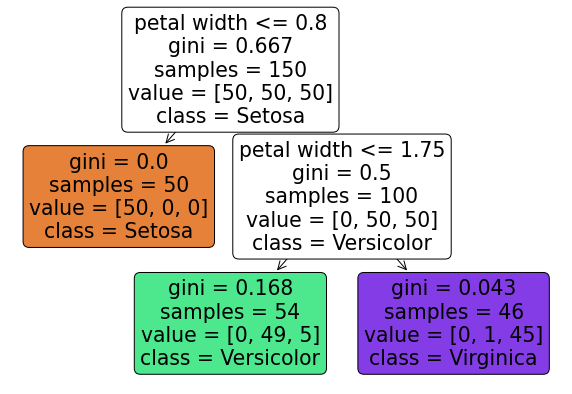

In [8]:
import matplotlib.pyplot as plt
from pydotplus import graph_from_dot_data
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.tree import plot_tree

tree = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=1)
tree.fit(X, y)

plt.figure(figsize=(10, 7))

plot_tree(tree, 
          filled=True, 
          rounded=True,
          class_names=['Setosa', 
                       'Versicolor',
                       'Virginica'],
          feature_names=['petal length', 
                         'petal width']) 

plt.show()

### Jak podejmowane są decyzje w drzewie?

Klasyfikacja próbki zaczyna się zawsze od korzenia (węzeł na samej górze grafu). W węźle zadawane jest pytanie (w przykładnie powyżej czy długość płatka jest mniejsza od 0.8). Jeśli prawda przechodzimy do węzła potomnego lewego, w przeciwnym razie do prawego. Przechodząc do węzła lewego dochodzimy do **liścia** (leaf node, nie posiada węzłów potomnych) - w taki wypadku żadne pytanie nie jest zadawane, przydzielana jest już tylko klasa do danej obserwacji. 

W przypadku, gdy skierujemy się ku węzłowi prawemu (nie jest już liściem) zadajemy kolejne pytanie, aż dojdziemy do liścia.

Znaczenie atrybutów:

- *samples* - oznacza ilość wyznaczonych próbek dla danego węzła (zgadza się to w przedstawionym przypadku z ilością próbek dla danych klas)
- *value* - określa ilość przykładów uczących z każdej klasy jakie przynależą do danego węzła.
- *gini* - miara zanieczyszczenia węzła (0 oznacza, że wszystkie próbki w węźle należą do jednej klasy - idealna klasyfikacja)

Wskaźnik Gingiego:
    \begin{equation*}
 G_{i} = 1 - \sum_{k=1}^{n} p_{i, k}^{2}
\end{equation*}
gdzie $p_{i,k}$ oznacza współczynie występowania klas k, wśród próbek uczących w węźle i.

Jako wskaźnik zanieczyszczenia (parametr *entropy*), użyta może zostać również miara entropii. Wynosi ona 0, w przypadku, gdy wszystkie informacje są takie same - wszystkie próbiki w węźle należą do jednej klasy.

Entropia:
    
\begin{equation*}
    H_{i} = - \sum_{k=1\\ p_{i,k} \neq 0}^{n} p_{i, k} log(p_{i,k})
\end{equation*}


Różnice pomędzy tymi dwoma miarami są zazwyczaj bardzo znikome i nie wypływają znacząco na skuteczność działania klasyfikatora. Dla zainteresowanych szczegółami zapraszam do lektury: https://sebastianraschka.com/faq/docs/decision-tree-binary.html, https://towardsdatascience.com/the-simple-math-behind-3-decision-tree-splitting-criterions-85d4de2a75fe

W jakim momencie przestać budować drzewo decyzyje?

Problemy rozważane w uczeniu maszynowym mają zazwyczaj sporą liczbę cech, która może powodować wysoko rosnące skomplikowanie drzewa (jego wielkość, sporą ilość węzłów oraz podziałów w węzłach). Tak utworzone drzewa mogą powodować nadmierne dopasowanie do danych treningowych.

Algorytm drzewa decyzyjnego posiada parametry, które ustalane są podczas uczenia. Jak wspomniano, może powodować to przetrenowanie klasyfikatora (nadmierne dopasowanie do danych uczących). Aby tego uniknąć, dobrym rozwiązaniem okazuje się ograniczenie swobody działania klasyfikatora. Podobnie jak w przypadku klasyfikatora SVC, również dla drzewa decyzyjnego zdefinowane zostały parametry regularyzacyjne:

- *max_depth* - maksymalna wysokość drzewa
- *min_samples_split* - minimalna liczba próbek, jakie będą w węźle (przed podziałem)
- *min_samples_leaf* - minimalna liczba próbek, jakie będą w liściu
- *max_leaf_nodes* - maksymalna ilość liści
- *max_features* - maksymalna liczba cech używana do dzielenia węzła.

Modyfikacja tych parametrów powoduje regularyzację drzewa i zmniejsza ryzyko przetrenowania.

## Zadania

### Zadanie 1

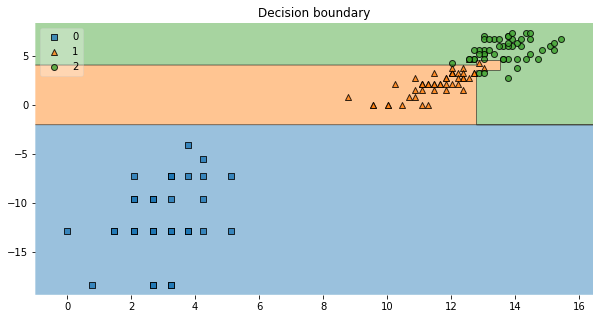

In [45]:
import mlxtend
from mlxtend.plotting import plot_decision_regions

tree = DecisionTreeClassifier(max_depth=10, criterion="entropy", random_state=1)
#tree = DecisionTreeClassifier(max_depth=100, criterion="entropy", random_state=1)
#tree = DecisionTreeClassifier(max_depth=100, criterion="gini", random_state=1)
tree.fit(np.log(X ** 8), y)
fig = plt.figure(figsize=(10,5))
labels = ['Decision Tree']
fig = plot_decision_regions(X=np.log(X ** 8), y=y, clf=tree, legend=2)
plt.title("Decision boundary")
plt.show()

Jakie wnioski możne sformuować na bazie granic decyzyjnych przedstawionych powyżej? W momencie pojawianie się dodatkowej próbki klasy *zielonej* (2), zostanie ona dobrze sklasyfikowana? Czy klasyfikator posiada dobre właściwości generalizujące?

W przypadku zmiany wysokości drzewa w granicach nie zaszła żadna zmiana

Zmiana kryterium na gini również nie spowodowała zmiany w rozmieszczeniu granic w powyższym przykładzie

Na podstawie powyższego grafu można wywnioskować, że klasa niebieska ma zerowy współczynnik zanieczyszczenia i wszystkie próbki w węźle należą do jednej klasy, natomiast klasy pomarańczowa i zielona nie mają zerowego współczynnika zanieczyszczenia, więc w momencie pojawienia się dodatkowej próbki zielonej istnieje minimalna szansa, że zamiast do węzła zielonego trafi ona do węzła pomarańczowego.

### Zadanie 2

Proszę wytrenować zbiór z użyciem algorytmu drzewa decyzyjnego. Proszę pamiętać o odpowienim podziale na zbiór uczący i treningowy. Klasyfikator powinien być trenowany na zbiorze treningowym, a wynik jego skuteczności po trenowaniu obliczany w oparciu o zbiór testowy.

Proszę przygotować wyniki, trenując algorytm z użyciem różnych parametrów - należy przygotować wykresy (oś pionowa określa skuteczność, pozioma wartość parametru) pokazujące jak zmienia się skuteczność działania w zależności od zastosowanych wartości parametrów. Proszę o przygotowanie odpowiedniego porównania (tabela), co można zaobserwować?

[['criterion' 'max_depth' 'min_samples_split' 'max_leaf_nodes'
  'max_features' 'accuracy']
 ['gini' '1' '2' '2' '1' '0.5416666666666666']
 ['gini' '1' '2' '2' '2' '0.5833333333333334']
 ...
 ['entropy' '9' '8' '2' '7' '0.7083333333333334']
 ['entropy' '9' '8' '2' '8' '0.7083333333333334']
 ['entropy' '9' '8' '2' '9' '0.7083333333333334']]
[[1.         0.70833333]
 [2.         0.70833333]
 [3.         0.75      ]
 [4.         0.75      ]
 [5.         0.54166667]
 [6.         0.58333333]
 [7.         0.54166667]
 [8.         0.58333333]
 [9.         0.58333333]]


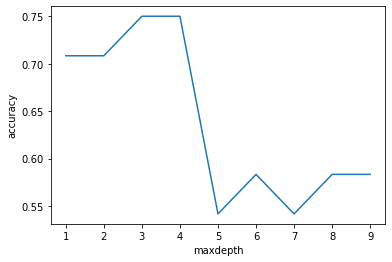

[[1.         0.375     ]
 [2.         0.5       ]
 [3.         0.58333333]
 [4.         0.625     ]
 [5.         0.66666667]
 [6.         0.70833333]
 [7.         0.70833333]
 [8.         0.54166667]
 [9.         0.58333333]]


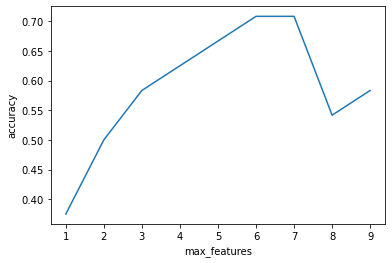

In [175]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

'''
max_depth - maksymalna wysokość drzewa
min_samples_split - minimalna liczba próbek, jakie będą w węźle (przed podziałem)
min_samples_leaf - minimalna liczba próbek, jakie będą w liściu
max_leaf_nodes - maksymalna ilość liści
max_features - maksymalna liczba cech używana do dzielenia węzła.
'''
df = pd.read_csv('C:/Users/Gabriela/Desktop/studia PK/MOW/datasets/Breast.csv')
X = df[['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']]
y = df['Classification'] = df['Classification'].map(lambda x: 1 if x == 2 else 0)
#df.boxplot()
#print(y)
X_train, X_test, y_train, y_test = train_test_split(df[['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']], df['Classification'], test_size=0.2, random_state = 27)
table_data = [['criterion', 'max_depth', 'min_samples_split', 'max_leaf_nodes', 'max_features', 'accuracy']]
for criterion in ['gini', 'entropy']:
    for max_depth in np.arange(1,10,1):
        for min_samples_split in np.arange(2,10,2):
            for max_leaf_nodes in np.arange(2,3,1):
                for max_features in np.arange(1,10,1):
                    classifier = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, max_leaf_nodes=max_leaf_nodes, max_features=max_features, random_state=1)
                    classifier.fit(X_train, y_train)
                    y_pred = classifier.predict(X_test) 
                    table_data.append([criterion, max_depth, min_samples_split, max_leaf_nodes, max_features, accuracy_score(y_test, y_pred)])


table_data = np.array(table_data)
print(table_data)
table_data2 = []
for max_depth in np.arange(1,10,1):
    classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=1)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test) 
    table_data2.append([max_depth, accuracy_score(y_test, y_pred)])


table_data2 = np.array(table_data2)
print(table_data2)
xmaxdepth = table_data2[:,0]
ymaxdepth = table_data2[:,1]

plt.figure()
plt.plot(xmaxdepth, ymaxdepth)
plt.xlabel('maxdepth')
plt.ylabel('accuracy')
plt.show()


table_data3 = []
for max_features in np.arange(1,10,1):
    classifier = DecisionTreeClassifier(max_features=max_features, random_state=1)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test) 
    table_data3.append([max_features, accuracy_score(y_test, y_pred)])


table_data3 = np.array(table_data3)
print(table_data3)
xmax_features = table_data3[:,0]
ymax_features = table_data3[:,1]

plt.figure()
plt.plot(xmax_features, ymax_features)
plt.xlabel('max_features')
plt.ylabel('accuracy')
plt.show()

Wykres zależności skuteczności od maksymalnej wysokości drzewa pokazuje, że najwyższa skuteczność występuje przy wysokości drzewa równej 3 i 4, po czym gwałtownie spada, wniosek: nie można ustawiać zbyt dużej maksymalnej wysokości drzewa, ponieważ po przekroczeniu określonego pułapu skuteczność jest dużo mniejsza

Wykres zależności skuteczności od maksymalnej liczby cech używanych do dzielenia węzła pokazuje, że wraz ze wzrostem liczby cech skuteczność rośnie do około 6, 7 cech, po czym skuteczność gwałtownie spada.

Wniosek: Warto definiować konkretne parametry regularyzacyjne w celu uzyskania najlepszych rezultatów.

### Zadanie 3

Drzewa decyzyjne mogą również szacować przewdopodobieństwo przynależności danej próbki do określonej klasy. Proszę przeprowadzić odpowiednie trenowanie klasyfikatora i określić jak zmienia się prawdopodobieństwo przynależności różnych próbek. Wystarczy odnaleźć odpowienią właściwość klasyfikatora i pokazać jakie jest zwracane prawdopodobieństwo dla kilku przykładów.

In [206]:
classifier = DecisionTreeClassifier(max_depth=3, max_features=2, criterion="gini", random_state=27)
classifier.fit(X_train, y_train)
y_pred_probability = classifier.predict_proba(X_test)
print(y_pred_probability)

X = np.array(X)
y = np.array(y)

[[0.64102564 0.35897436]
 [0.64102564 0.35897436]
 [0.64102564 0.35897436]
 [0.25       0.75      ]
 [0.         1.        ]
 [0.64102564 0.35897436]
 [0.64102564 0.35897436]
 [0.26315789 0.73684211]
 [0.64102564 0.35897436]
 [0.25       0.75      ]
 [0.26315789 0.73684211]
 [0.64102564 0.35897436]
 [0.25       0.75      ]
 [0.64102564 0.35897436]
 [0.26315789 0.73684211]
 [0.25       0.75      ]
 [0.64102564 0.35897436]
 [0.64102564 0.35897436]
 [0.64102564 0.35897436]
 [0.64102564 0.35897436]
 [0.26315789 0.73684211]
 [0.64102564 0.35897436]
 [0.25       0.75      ]
 [1.         0.        ]]


### Zadanie 4

Proszę wyrysować granice decyzyjne dla klasyfikatora drzewa decyzyjnego utworzonego we wcześniejszym zadaniu. Jakie można sformuować wnioski?

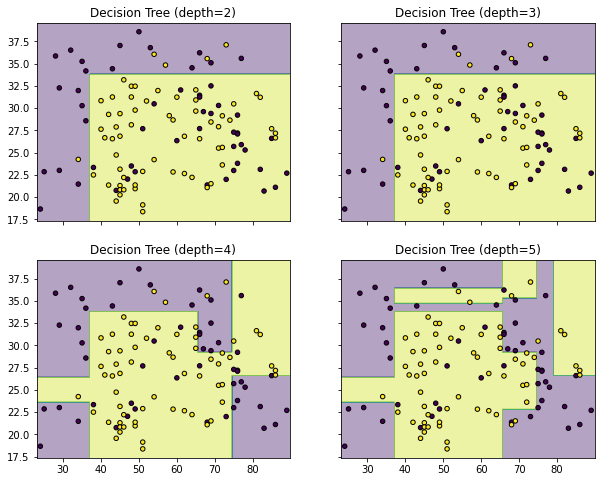

In [232]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

X = X[:, [0, 1]]
y = y

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=2, max_features=1, criterion="gini", random_state=27)
clf2 = DecisionTreeClassifier(max_depth=3, max_features=1, criterion="gini", random_state=27)
clf3 = DecisionTreeClassifier(max_depth=4, max_features=2, criterion="gini", random_state=27)
clf4 = DecisionTreeClassifier(max_depth=5, max_features=2, criterion="gini", random_state=27)

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
clf4.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, clf4],
                        ['Decision Tree (depth=2)', 'Decision Tree (depth=3)',
                         'Decision Tree (depth=4)', 'Decision Tree (depth=5)']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)
plt.show()